## AUTOENCODERS
In this notebook you will find an explanation of what is an autoencoder, how it works, and see an implementation of an autoencoder in TensorFlow. By the end of this notebook, you should be able to create simple autoencoders and how to apply them to problems that involves unsupervised learning.

<a href="https://colab.research.google.com/github/parmarsuraj99/Autoencoders/blob/master/DeepAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Introduction
An autoencoder, also known as autoassociator or Diabolo networks, is an artificial neural network employed to recreate the given input. It takes a set of unlabeled inputs, encodes them and then tries to extract the most valuable information from them. They are used for feature extraction, learning generative models of data, dimensionality reduction and can be used for compression.

A 2006 paper named Reducing the Dimensionality of Data with Neural Networks, done by G. E. Hinton and R. R. Salakhutdinov, showed better results than years of refining other types of network, and was a breakthrough in the field of Neural Networks, a field that was "stagnant" for 10 years.

Now, autoencoders, based on Restricted Boltzmann Machines, are employed in some of the largest deep learning applications. They are the building blocks of Deep Belief Networks (DBN).


## Autoencoder Structure


An autoencoder can be divided in two parts, the encoder and the decoder.

The encoder needs to compress the representation of an input. In this case we are going to reduce the dimension the face of our actor, from 2000 dimensions to only 30 dimensions, by running the data through layers of our encoder.

The decoder works like encoder network in reverse. It works to recreate the input, as closely as possible. This plays an important role during training, because it forces the autoencoder to select the most important features in the compressed representation

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

Reshaping images, Flattening them to feed to a Dense network

we won't do this in ConvNets

In [0]:
x_train = x_train.reshape(len(x_train), (x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape(len(x_test), (x_test.shape[1]*x_test.shape[2]))

In [0]:
encoding_dim = 32

input_img = Input(shape = (784, ))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim, ))
decode_layer1 = autoencoder.layers[-2]
decode_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decode_layer2(decode_layer1(encoded_input)))

In [0]:
autoencoder.get_layer('dense_5')

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2129 - acc: 0.7929 - val_loss: 0.1578 - val_acc: 0.8043
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1422 - acc: 0.8077 - val_loss: 0.1278 - val_acc: 0.8080
Epoch 3/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1226 - acc: 0.8108 - val_loss: 0.1157 - val_acc: 0.8114
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1142 - acc: 0.8118 - val_loss: 0.1086 - val_acc: 0.8115
Epoch 5/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1088 - acc: 0.8125 - val_loss: 0.1063 - val_acc: 0.8110
Epoch 6/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1050 - acc: 0.8129 - val_loss: 0.1020 - val_acc: 0.8117
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1019 - acc: 0.8132 - val_loss: 0.

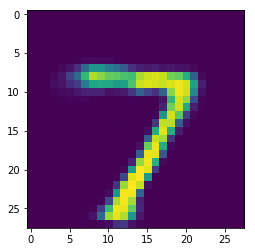

In [0]:
encoded_images = encoder.predict(x_test)
encoded_images.shape
predicted = decoder.predict(encoded_images)
plt.imshow(predicted[0].reshape(28, 28))

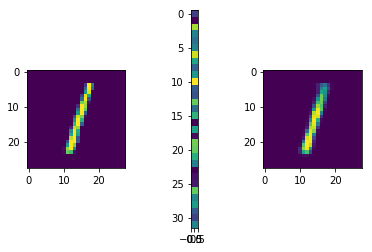

In [0]:
def plot_imgs(index=0):
  f = plt.figure()
  f.add_subplot(1,3, 1)
  plt.imshow(x_test[index].reshape(28, 28))
  f.add_subplot(1,3, 2)
  plt.imshow(encoded_images[index].reshape(-1, 1))
  f.add_subplot(1,3, 3)
  plt.imshow(predicted[index].reshape(28, 28))
  plt.show(block=True)
  
plot_imgs(2)

# Let's use Convolutional Neural Nets to get better results

In [0]:
from keras.layers import Dense, Input, UpSampling2D, Conv2D

Getting data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [0]:
img_height, img_width, _ = x_train[1].shape

In [0]:
def CNN_AE():
    input_img = Input(shape=(img_width, img_height, 1))
    
    # Encoding network
    x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x)
    encoded = Conv2D(32, (2, 2), activation='relu', padding="same", strides=2)(x)

    # Decoding network
    x = Conv2D(32, (2, 2), activation='relu', padding="same")(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    encoder = Model(input_img, encoded)
    
    return Model(input_img, decoded), encoder

In [0]:
model_cnn, encoder = CNN_AE()
model_cnn.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
cnn_hist = model_cnn.fit(x_train, x_train, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 20s 339us/step - loss: 0.0899 - val_loss: 0.0844


In [0]:
reconstruct = model_cnn.predict(x_test)

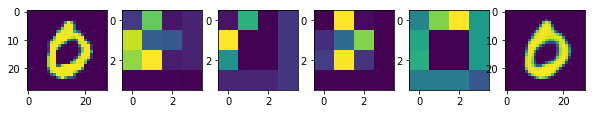

In [0]:
def plot_imgs_for_cnn(index=0):
  f = plt.figure(figsize=(10, 10))
  f.add_subplot(1,6, 1)
  plt.imshow(x_test[index].reshape(28, 28))
   
  
  f.add_subplot(1,6, 2)
  plt.imshow(encoded_images[index][:, :, 0])
  f.add_subplot(1,6, 3)
  plt.imshow(encoded_images[index][:, :, 1])
  f.add_subplot(1,6, 4)
  plt.imshow(encoded_images[index][:, :, 2])
  f.add_subplot(1,6, 5)
  plt.imshow(encoded_images[index][:, :, 3])
  
  
  f.add_subplot(1,6, 6)
  plt.imshow(reconstruct[index].reshape(28,28))
  
  plt.show(block=True)
  
plot_imgs_for_cnn(3)

# **Denoising example**

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [155]:
cnn_hist = model_cnn.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 20s 333us/step - loss: 0.1180 - val_loss: 0.1100


In [0]:
reconstruct = model_cnn.predict(x_test_noisy)
encoded_images= encoder.predict(x_test_noisy)

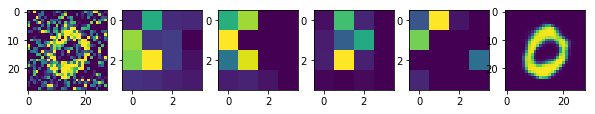

In [163]:
def plot_imgs_for_cnn_noisy(index=0):
  f = plt.figure(figsize=(10, 10))
  f.add_subplot(1,6, 1)
  plt.imshow(x_test_noisy[index].reshape(28, 28))
   
  
  f.add_subplot(1,6, 2)
  plt.imshow(encoded_images[index][:, :, 0])
  f.add_subplot(1,6, 3)
  plt.imshow(encoded_images[index][:, :, 1])
  f.add_subplot(1,6, 4)
  plt.imshow(encoded_images[index][:, :, 2])
  f.add_subplot(1,6, 5)
  plt.imshow(encoded_images[index][:, :, 3])
  
  
  f.add_subplot(1,6, 6)
  plt.imshow(reconstruct[index].reshape(28,28))
  
  plt.show(block=True)
  
plot_imgs_for_cnn_noisy(3)